In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load datasets
df1 = pd.read_csv('cleaned_carsome_data.csv')
df2 = pd.read_csv('cleaned_carlist_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# merge into single dataset
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df.to_csv('merged_data.csv', index=False)

merged_df.head()

,Model,Brand,Year,Price,Mileage,Transmission
0,Nissan Almera,Nissan,2015,21000,149490,Automatic
1,Perodua Aruz,Perodua,2019,50600,88806,Automatic
2,Daihatsu Gran,Daihatsu,2021,40000,104943,Manual
3,Mercedes-Benz C250,Mercedes-Benz,2010,43000,147362,Automatic
4,Proton Iriz,Proton,2019,31900,52965,Automatic


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         4247 non-null   object
 1   Brand         4247 non-null   object
 2   Year          4247 non-null   int64 
 3   Price         4247 non-null   int64 
 4   Mileage       4247 non-null   int64 
 5   Transmission  4247 non-null   object
dtypes: int64(3), object(3)
memory usage: 199.2+ KB


In [41]:
merged_df.describe()

,Year,Price,Mileage
count,4247.000000,4.247000e+03,4247.000000
mean,2017.614551,7.097179e+04,80987.526489
std,3.368903,8.164272e+04,39471.235302
min,1996.000000,5.999000e+03,18.000000
25%,2016.000000,3.480000e+04,53981.000000
50%,2018.000000,5.080000e+04,78555.000000
75%,2020.000000,7.980000e+04,102722.000000
max,2024.000000,2.650000e+06,292000.000000


In [42]:
# Data Cleaning
print(merged_df.isnull().sum()) # removing null values

Model           0
Brand           0
Year            0
Price           0
Mileage         0
Transmission    0
dtype: int64


In [9]:
merged_df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [43]:
# converting data types
merged_df['Brand'] = merged_df['Brand'].astype('category')
merged_df['Transmission'] = merged_df['Transmission'].astype('category')
merged_df['Model'] = merged_df['Model'].astype('category')

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 0 to 4246
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Model         3926 non-null   category
 1   Brand         3926 non-null   category
 2   Year          3926 non-null   int64   
 3   Price         3926 non-null   int64   
 4   Mileage       3926 non-null   int64   
 5   Transmission  3926 non-null   category
dtypes: category(3), int64(3)
memory usage: 150.5 KB


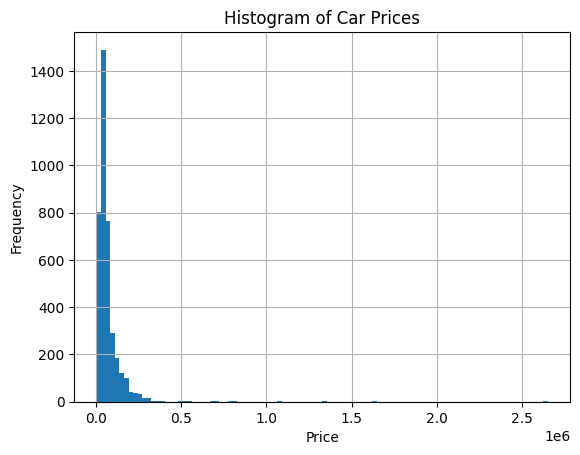

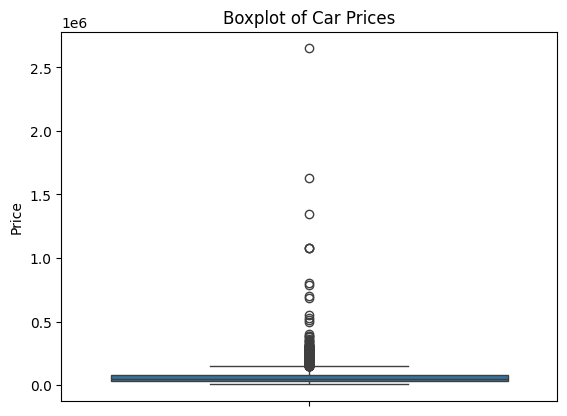

In [20]:
# analysing response variable: Price
# Histogram
merged_df['Price'].hist(bins=100)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(merged_df['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

Boxplot shows the presence of extreme outliers above the upper whisker. A log transformation will be applied.

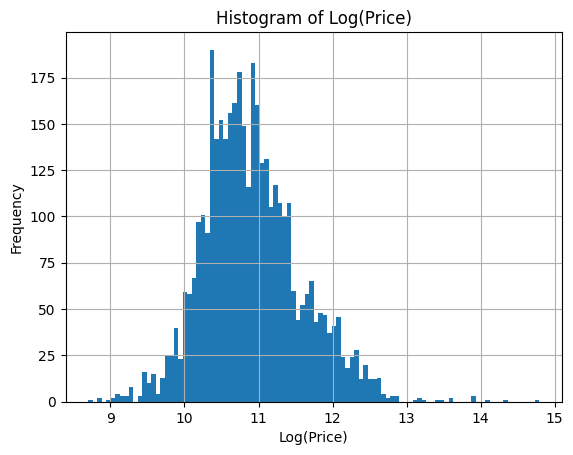

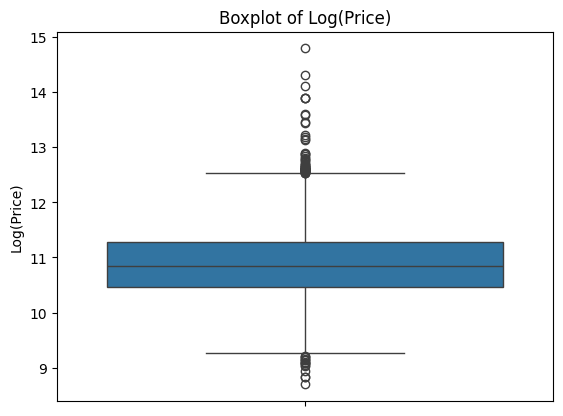

In [21]:
# Applying log transformation
# Histogram
np.log1p(merged_df['Price']).hist(bins=100)
plt.title('Histogram of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(np.log1p(merged_df['Price']))
plt.title('Boxplot of Log(Price)')
plt.ylabel('Log(Price)')
plt.show()

Model
Perodua Myvi           454
Perodua Bezza          213
Perodua AXIA           206
Honda City             178
Toyota Vios            162
                      ... 
Mercedes-Benz C200K      1
Honda Step WGN           1
Nissan Vanette           1
Honda Freed              1
Mitsubishi Lancer        1
Name: count, Length: 223, dtype: int64


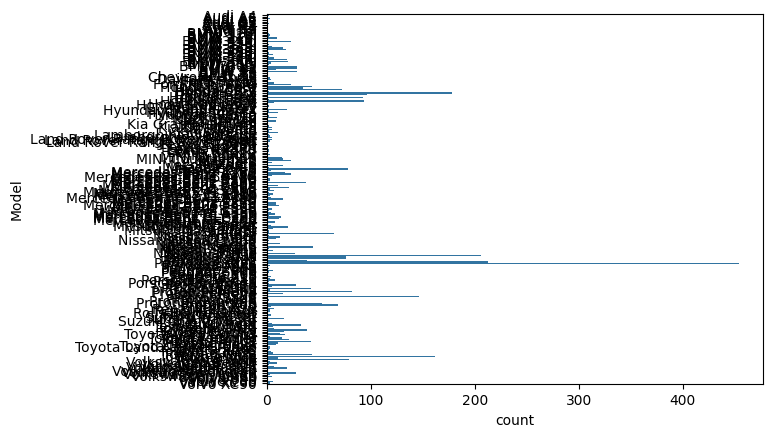

In [22]:
# analysing exploratory variable 1: Model
print(merged_df['Model'].value_counts())
sns.countplot(y='Model', data=merged_df)
plt.show()

In [24]:
# combine rare categories
rare_categories = merged_df['Model'].value_counts()[merged_df['Model'].value_counts() < 10].index
merged_df['Model'] = merged_df['Model'].replace(rare_categories, 'Other')

<ipython-input-24-d5e16dd62080>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_df['Model'] = merged_df['Model'].replace(rare_categories, 'Other')


In [26]:
# Determine correlation between Price and Mode
merged_df.groupby('Model')['Price'].mean().sort_values(ascending=False)

<ipython-input-26-cb7384d5d2ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('Model')['Price'].mean().sort_values(ascending=False)


,Price
Model,
Mercedes-Benz GLC300,267299.000000
BMW 530i,204938.000000
Mercedes-Benz C300,204222.636364
Mercedes-Benz E300,192791.666667
BMW 330i,192547.315789
...,...
Perodua AXIA,30074.101942
Proton Exora,29613.857143
Nissan Grand,29246.153846


Average price of different models differs, suggesting an association between Model and Price.

Brand
Perodua          1067
Honda             629
Toyota            550
Proton            457
Mercedes-Benz     251
BMW               249
Nissan            187
Mazda             142
Volkswagen         75
Mitsubishi         40
Kia                37
Ford               36
Hyundai            34
Subaru             22
MINI               20
Porsche            18
Volvo              16
Audi               14
Land               13
Peugeot            12
Isuzu              10
Renault            10
Lexus               9
Suzuki              8
Lamborghini         5
Rolls-Royce         3
Inokom              3
Daihatsu            3
Naza                2
Neta                2
Smart               1
Chevrolet           1
Name: count, dtype: int64


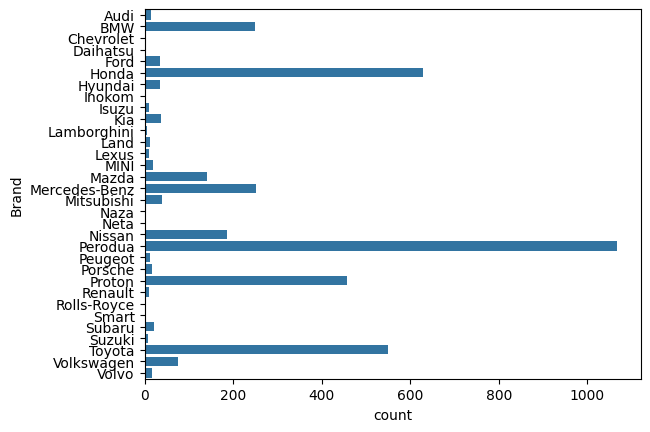

In [27]:
# analysing exploratory variable 2: Brand
print(merged_df['Brand'].value_counts())
sns.countplot(y='Brand', data=merged_df)
plt.show()

In [28]:
# Determine correlation between Price and Mode
merged_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

<ipython-input-28-51727bc4615b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)


,Price
Brand,
Lamborghini,1.448000e+06
Rolls-Royce,1.042833e+06
Porsche,3.020160e+05
Land,2.405923e+05
Volvo,1.846158e+05
Mercedes-Benz,1.485342e+05
MINI,1.438037e+05
BMW,1.407687e+05
Lexus,1.175431e+05


<ipython-input-29-97a987724a39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=merged_df, palette='Set2')


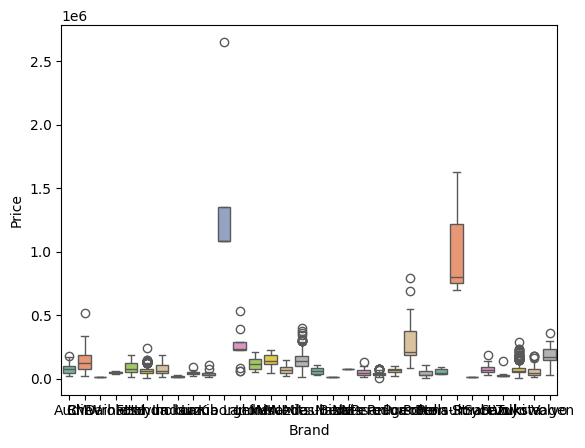

In [29]:
# Boxplot
sns.boxplot(x='Brand', y='Price', data=merged_df, palette='Set2')
plt.show()

Average price of different brands differs, suggesting an association between Brand and Price.

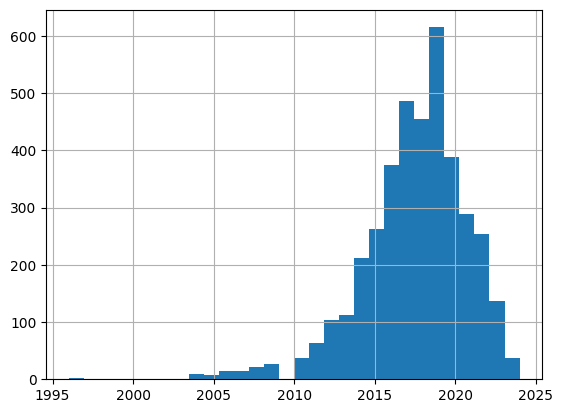

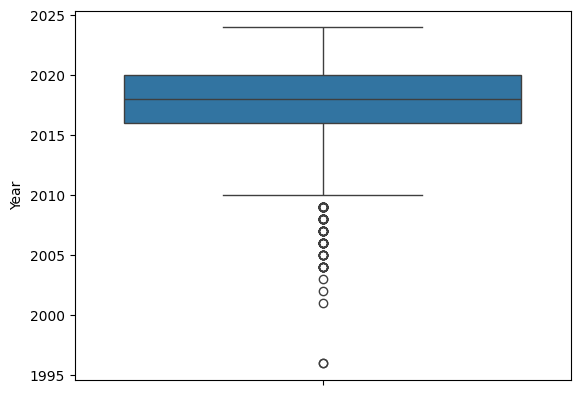

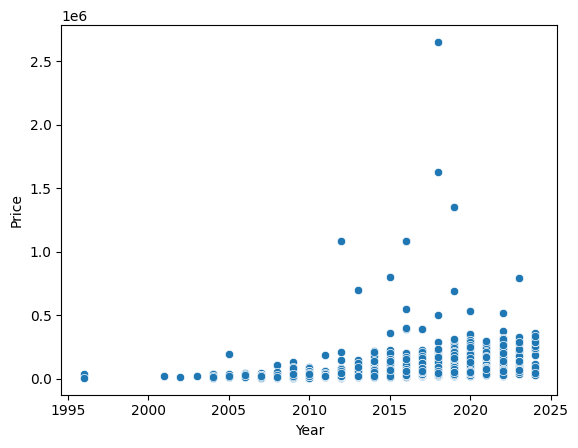

In [30]:
# analysing exploratory variable 3: Year
# Histogram
merged_df['Year'].hist(bins=30)
plt.show()

# Boxplot
sns.boxplot(merged_df['Year'])
plt.show()

# analysing correlation
# Scatterplot
sns.scatterplot(x='Year', y='Price', data=merged_df)
plt.show()

Boxplot shows the presence of outliers below the lower whisker, indicating presence of old cars. Since these used cars are likely to be rare and will become obsolete soon, we will remove these outliers.

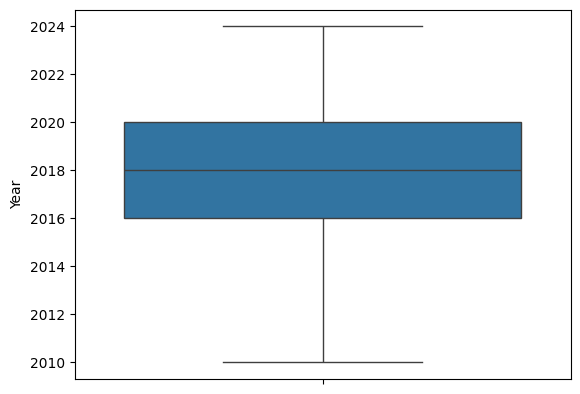

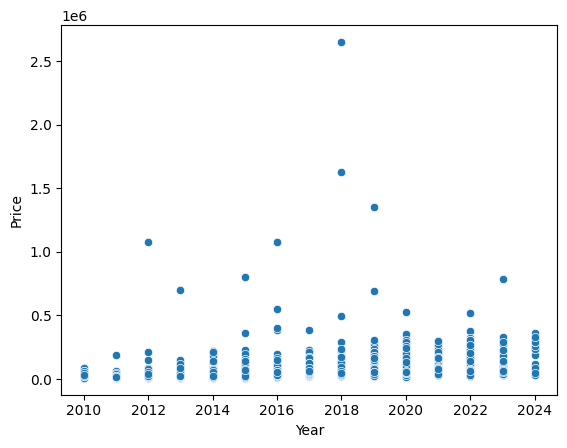

In [32]:
# removing outliers
Q1 = merged_df['Year'].quantile(0.25)
Q3 = merged_df['Year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = merged_df[(merged_df['Year'] >= lower_bound) & (merged_df['Year'] <= upper_bound)]
filtered_data.to_csv('filtered_merged_data.csv', index=False)

# Re-plot
# Boxplot
sns.boxplot(filtered_data['Year'])
plt.show()

# analysing correlation
# Scatterplot
sns.scatterplot(x='Year', y='Price', data=filtered_data)
plt.show()

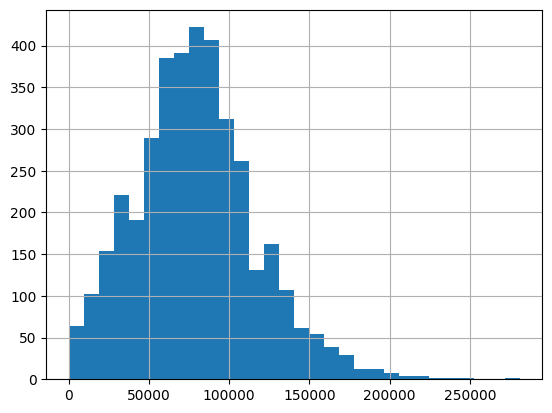

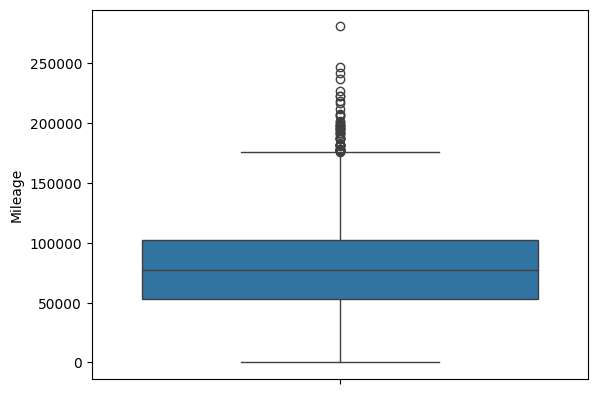

In [35]:
# analysing exploratory variable 4: Mileage
# Histogram
filtered_data['Mileage'].hist(bins=30)
plt.show()

# Boxplot
sns.boxplot(filtered_data['Mileage'])
plt.show()

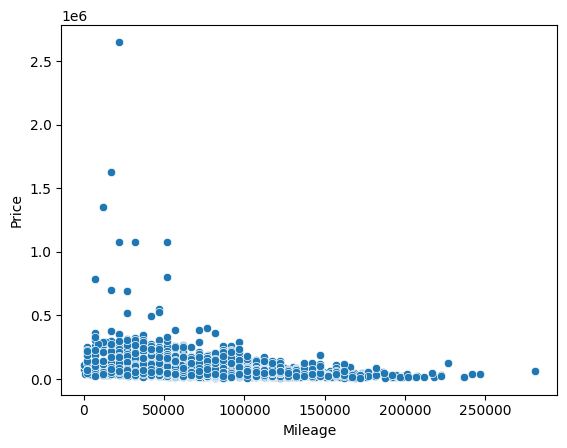

In [36]:
# analysing correlation
# Scatterplot
sns.scatterplot(x='Mileage', y='Price', data=filtered_data)
plt.show()

Low mileage cars are on average more expensive than high mileage cars.

Transmission
Automatic    4176
Manual         71
Name: count, dtype: int64


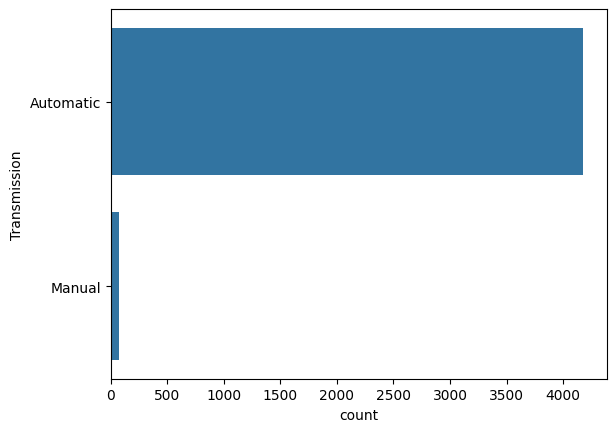

<ipython-input-49-57cd59dff4fa>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby('Transmission')['Price'].mean().sort_values(ascending=False))
<ipython-input-49-57cd59dff4fa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price', data=merged_df, palette='Set2')


Transmission
Automatic    71166.341715
Manual       59528.901408
Name: Price, dtype: float64


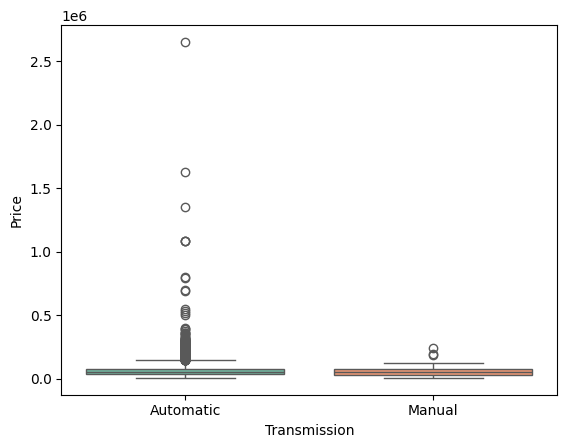

In [49]:
# analysing exploratory variable 5: Transmission
print(merged_df['Transmission'].value_counts())
sns.countplot(y='Transmission', data=merged_df)
plt.show()

# analysing correlation
print(merged_df.groupby('Transmission')['Price'].mean().sort_values(ascending=False))

# Boxplot
sns.boxplot(x='Transmission', y='Price', data=merged_df, palette='Set2')
plt.show()

Automatic cars are on average more expensive than manual cars, suggesting an association between Transmission and Price.

Concluding remarks: there seems to be an association between Price and all 5 exploratory variables. All 5 variables will be included in our linear model.